In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy

In [33]:
phi,V0,lam_sym = sp.symbols('phi V0 lam',real =True)


V=V0*(1-sp.exp(-sp.sqrt(2/3)*phi))**2
dVdphi = sp.diff(V,phi)
d2Vdphi2 = sp.diff(V,phi,2)
lam = -1/V *dVdphi
gam = (d2Vdphi2*V)/(dVdphi**2)

lam_simplified = sp.simplify(lam)
print("lam(phi) =", lam_simplified)

# Substitute phi(lambda)
phi_of_lam = sp.sqrt(3/2) * sp.log(1 + 2*sp.sqrt(2/3)/lam_sym)
gam_of_lam = gam.subs(phi, phi_of_lam)
gam_of_lam_simplified = sp.simplify(gam_of_lam)
print(rf"gamma(lam) =", gam_of_lam_simplified)

#test = gam_of_lam_simplified.subs(lam_sym,5)
#print(test)

lam(phi) = 1.63299316185545/(1 - exp(0.816496580927726*phi))
gamma(lam) = 1.0 - 0.5*((lam + 1.63299316185545)/lam)**1.0


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_19709/1652279173.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

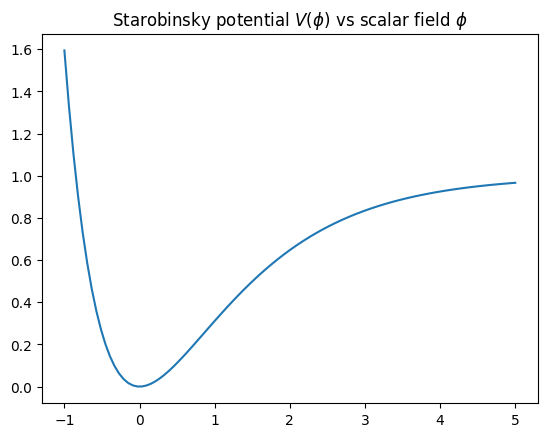

In [34]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2
plt.plot(phi,V)
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:35: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_19709/1305480286.py:35: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(sol.t, w, label='$\omega_\phi$')


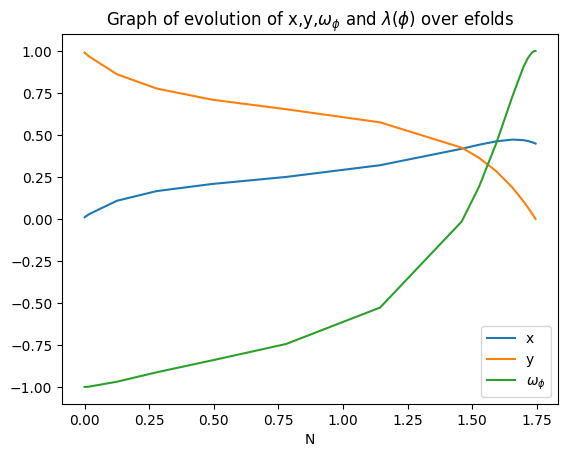

In [59]:
wb = 0  # dust

def Gamma(lam):
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def system(N, X):
    x, y, lam = X

    dx = (-3*x
          + np.sqrt(3/2)*lam*y**2
          + 1.5*x*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds

    dy = (-np.sqrt(3/2)*x*y*lam
          + 1.5*y*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds

    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds

    return [dx, dy, dlam]

# Initial conditions
X0 = [0.01, 0.99, 1]  #initial conditions for inflation, at inflation x<<y and y approaches 1, potential dominated.
N_span = (0, 60)# inflation started approx 60 efolds ago
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = solve_ivp(system, N_span, X0, dense_output=True)
w = ((sol.y[0])**2-(sol.y[1])**2)/((sol.y[0])**2+(sol.y[1])**2)
plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='y')
#plt.plot(sol.t, sol.y[2], label='$\lambda$')
plt.plot(sol.t, w, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()
